This analysis is to do some exploratory analysis and background for the model of sleep based on acceleroemter and interbeat interval data. 

The data comes from: https://physionet.org/content/sleep-accel/1.0.0/

The paper that compares the models for sleep stage classification is given here: https://github.com/ojwalch/sleep_classifiers/tree/main/data



In [1]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [2]:
path_to_dataset_accelerometer='/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion'
os.listdir(path_to_dataset_accelerometer)

['index.html',
 '5498603_acceleration.txt',
 '1360686_acceleration.txt',
 '2638030_acceleration.txt',
 '8530312_acceleration.txt',
 '1066528_acceleration.txt',
 '5383425_acceleration.txt',
 '5132496_acceleration.txt',
 '4314139_acceleration.txt',
 '781756_acceleration.txt',
 '8258170_acceleration.txt',
 '7749105_acceleration.txt',
 '4426783_acceleration.txt',
 '.ipynb_checkpoints',
 '759667_acceleration.txt',
 '1455390_acceleration.txt',
 '5797046_acceleration.txt',
 '8000685_acceleration.txt',
 '3509524_acceleration.txt',
 '9961348_acceleration.txt',
 '2598705_acceleration.txt',
 '4018081_acceleration.txt',
 '8692923_acceleration.txt',
 '9618981_acceleration.txt',
 '6220552_acceleration.txt',
 '1818471_acceleration.txt',
 '8173033_acceleration.txt',
 '9106476_acceleration.txt',
 '8686948_acceleration.txt',
 '844359_acceleration.txt',
 '46343_acceleration.txt',
 '1449548_acceleration.txt',
 '3997827_acceleration.txt']

In [5]:
print('Participants in the dataset')
for file in glob.glob(path_to_dataset_accelerometer+'/**/*.txt', recursive=True):
    print(file)
    file_name=file.split('/')[10]
    participant_id=file_name.split('_')[0]
    print(f'Participant_id = {participant_id}')

Participants in the dataset
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/5498603_acceleration.txt
Participant_id = 5498603
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/1360686_acceleration.txt
Participant_id = 1360686
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/2638030_acceleration.txt
Participant_id = 2638030
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/8530312_acceleration.txt
Participant_id = 8530312
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/1066528_acceleration.txt
Participant_id = 1066528
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/5383425_acceleration.txt
Participant_id = 5383425
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/5132496_acceleration.txt
Participant_id = 5132496
/nesi/nobackup/aut03802/dataset_sleep/phy

In [6]:
path_to_dataset_ibi='/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate'
os.listdir(path_to_dataset_ibi)

['9106476_heartrate.txt',
 'index.html',
 '2598705_heartrate.txt',
 '9618981_heartrate.txt',
 '2638030_heartrate.txt',
 '6220552_heartrate.txt',
 '7749105_heartrate.txt',
 '46343_heartrate.txt',
 '5797046_heartrate.txt',
 '.ipynb_checkpoints',
 '1455390_heartrate.txt',
 '5498603_heartrate.txt',
 '3997827_heartrate.txt',
 '3509524_heartrate.txt',
 '1818471_heartrate.txt',
 '4426783_heartrate.txt',
 '8530312_heartrate.txt',
 '781756_heartrate.txt',
 '5383425_heartrate.txt',
 '8686948_heartrate.txt',
 '5132496_heartrate.txt',
 '8258170_heartrate.txt',
 '1066528_heartrate.txt',
 '8173033_heartrate.txt',
 '4018081_heartrate.txt',
 '8692923_heartrate.txt',
 '844359_heartrate.txt',
 '1360686_heartrate.txt',
 '8000685_heartrate.txt',
 '9961348_heartrate.txt',
 '4314139_heartrate.txt',
 '759667_heartrate.txt',
 '1449548_heartrate.txt']

In [7]:
print('Participants in the dataset')
for file in glob.glob(path_to_dataset_ibi+'/**/*.txt', recursive=True):
    print(file)
    file_name=file.split('/')[10]
    participant_id=file_name.split('_')[0]
    print(f'Participant_id = {participant_id}')

Participants in the dataset
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/9106476_heartrate.txt
Participant_id = 9106476
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/2598705_heartrate.txt
Participant_id = 2598705
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/9618981_heartrate.txt
Participant_id = 9618981
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/2638030_heartrate.txt
Participant_id = 2638030
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/6220552_heartrate.txt
Participant_id = 6220552
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/7749105_heartrate.txt
Participant_id = 7749105
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/46343_heartrate.txt
Participant_id = 46343
/nesi/nobackup/aut03802/dataset_sleep/

In [8]:
path_to_dataset_labels='/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels'
os.listdir(path_to_dataset_labels)

['index.html',
 '2638030_labeled_sleep.txt',
 '4018081_labeled_sleep.txt',
 '8173033_labeled_sleep.txt',
 '8258170_labeled_sleep.txt',
 '1455390_labeled_sleep.txt',
 '.ipynb_checkpoints',
 '1066528_labeled_sleep.txt',
 '1449548_labeled_sleep.txt',
 '9618981_labeled_sleep.txt',
 '8692923_labeled_sleep.txt',
 '759667_labeled_sleep.txt',
 '9961348_labeled_sleep.txt',
 '46343_labeled_sleep.txt',
 '7749105_labeled_sleep.txt',
 '1360686_labeled_sleep.txt',
 '8686948_labeled_sleep.txt',
 '3997827_labeled_sleep.txt',
 '844359_labeled_sleep.txt',
 '4314139_labeled_sleep.txt',
 '4426783_labeled_sleep.txt',
 '8000685_labeled_sleep.txt',
 '781756_labeled_sleep.txt',
 '5498603_labeled_sleep.txt',
 '3509524_labeled_sleep.txt',
 '8530312_labeled_sleep.txt',
 '5797046_labeled_sleep.txt',
 '5132496_labeled_sleep.txt',
 '6220552_labeled_sleep.txt',
 '1818471_labeled_sleep.txt',
 '9106476_labeled_sleep.txt',
 '2598705_labeled_sleep.txt',
 '5383425_labeled_sleep.txt']

In [9]:
print('Participants in the dataset')
for file in glob.glob(path_to_dataset_labels+'/**/*.txt', recursive=True):
    print(file)
    file_name=file.split('/')[10]
    participant_id=file_name.split('_')[0]
    print(f'Participant_id = {participant_id}')

Participants in the dataset
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/2638030_labeled_sleep.txt
Participant_id = 2638030
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/4018081_labeled_sleep.txt
Participant_id = 4018081
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/8173033_labeled_sleep.txt
Participant_id = 8173033
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/8258170_labeled_sleep.txt
Participant_id = 8258170
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/1455390_labeled_sleep.txt
Participant_id = 1455390
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/1066528_labeled_sleep.txt
Participant_id = 1066528
/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/1449548_labeled_sleep.txt
Participant_id = 1449548
/nesi/nobackup/aut03802/dataset_sl

# Reading one of the files

In [25]:
path_to_5498603_acc = '/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/motion/8000685_acceleration.txt'
participant_5498603_acc=pd.read_csv(path_to_5498603_acc,sep=' ')

In [26]:
participant_5498603_acc.columns=['time_to_sleep','ax','ay','az']

In [27]:
participant_5498603_acc=participant_5498603_acc[participant_5498603_acc['time_to_sleep']>=0]

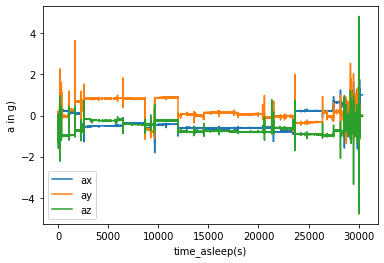

In [13]:
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['ax'],label='ax')
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['ay'],label='ay')
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['az'],label='az')
plt.xlabel('time_asleep(s)')
plt.ylabel('a in g)')
plt.legend()
plt.show()
           

In [23]:
path_to_5498603_ibi = '/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/heart_rate/8000685_heartrate.txt'
participant_5498603_ibi=pd.read_csv(path_to_5498603_ibi,sep=',')

In [24]:
participant_5498603_ibi.columns = ['time_to_sleep','ibi']

In [28]:
participant_5498603_ibi=participant_5498603_ibi[participant_5498603_ibi['time_to_sleep']>=0]

In [15]:
participant_5498603_ibi

,time_to_sleep,ibi
1244,5.16105,77
1245,10.16105,77
1246,11.16105,78
1247,20.16102,78
1248,25.16105,76
...,...,...
7031,30031.15763,100
7032,30033.15763,100
7033,30039.15763,100
7034,30048.15763,104


In [29]:

participant_5498603_ibi["marker"] = "ibi"
#participant_5498603_ibi["participant"] = "5498603"

participant_5498603_ibi = participant_5498603_ibi.rename(columns={'ibi': "value"})
#df_particpant_p=pd.DataFrame(columns=['marker','value'])

df_accx=participant_5498603_acc[['time_to_sleep', 'ax']]
df_accx["marker"] = "ax"
df_accx = df_accx.rename(columns={'ax': "value"})
df_participant =participant_5498603_ibi.append(df_accx)
df_accy=participant_5498603_acc[['time_to_sleep', 'ay']]
df_accy["marker"] = "ay"
df_accy = df_accy.rename(columns={'ay': "value"})
df_participant =df_participant.append(df_accy)
df_accz=participant_5498603_acc[['time_to_sleep', 'az']]
df_accy["marker"] = "az"
df_accz = df_accz.rename(columns={'az': "value"})
df_participant =df_participant.append(df_accy)
df_participant["participant"]="5498603"



       



/dev/shm/jobs/46274014/ipykernel_11537/2102774670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accx["marker"] = "ax"
/dev/shm/jobs/46274014/ipykernel_11537/2102774670.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_participant =participant_5498603_ibi.append(df_accx)
/dev/shm/jobs/46274014/ipykernel_11537/2102774670.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accy["marker"] = "ay"
/dev/shm/

In [30]:
df_participant

,time_to_sleep,value,marker,participant
1244,5.161050,77.000000,ibi,5498603
1245,10.161050,77.000000,ibi,5498603
1246,11.161050,78.000000,ibi,5498603
1247,20.161020,78.000000,ibi,5498603
1248,25.161050,76.000000,ibi,5498603
...,...,...,...,...
1654286,30394.892956,0.020187,az,5498603
1654287,30394.912894,0.019684,az,5498603
1654288,30394.932836,0.021667,az,5498603
1654289,30394.952839,0.019699,az,5498603


In [84]:
df_sensor_pivot =df_participant.pivot(index=['time_to_sleep','participant'], columns=["marker"], values=["value"])

In [85]:
df_sensor_pivot= df_sensor_pivot.reset_index()

In [86]:
df_sensor_pivot.columns=['time_to_sleep','participant','ax','ay','az','ibi']

In [87]:
df_sensor_pivot

,time_to_sleep,participant,ax,ay,az,ibi
0,0.011281,5498603,-0.780762,-0.147369,-0.147369,NaN
1,0.031235,5498603,-0.779297,-0.154694,-0.154694,NaN
2,0.051194,5498603,-0.778336,-0.147324,-0.147324,NaN
3,0.071148,5498603,-0.776856,-0.144867,-0.144867,NaN
4,0.091204,5498603,-0.765518,-0.146866,-0.146866,NaN
...,...,...,...,...,...,...
1506832,30394.892956,5498603,1.001465,0.020187,0.020187,NaN
1506833,30394.912894,5498603,1.001465,0.019684,0.019684,NaN
1506834,30394.932836,5498603,1.002441,0.021667,0.021667,NaN
1506835,30394.952839,5498603,1.001450,0.019699,0.019699,NaN


In [88]:
path_to_5498603_labels = '/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/5498603_labeled_sleep.txt'
participant_5498603_labels=pd.read_csv(path_to_5498603_labels,sep=' ')
participant_5498603_labels.columns=['time_to_sleep','sleep_stage']
participant_5498603_labels['time_to_sleep'] = participant_5498603_labels['time_to_sleep'].astype('float64')
# Merge participant_labels with df_sensor_pivot on 'time_to_sleep' column
df_sensor_pivot = df_sensor_pivot.merge(participant_5498603_labels, on='time_to_sleep', how='outer')

# Optionally, forward fill the sleep stage labels to fill NaN values in case there are gaps



,time_to_sleep,participant,ax,ay,az,ibi,sleep_stage
0,0.011281,5498603,-0.780762,-0.147369,-0.147369,NaN,NaN
1,0.031235,5498603,-0.779297,-0.154694,-0.154694,NaN,NaN
2,0.051194,5498603,-0.778336,-0.147324,-0.147324,NaN,NaN
3,0.071148,5498603,-0.776856,-0.144867,-0.144867,NaN,NaN
4,0.091204,5498603,-0.765518,-0.146866,-0.146866,NaN,NaN
...,...,...,...,...,...,...,...
1507590,22620.000000,5498603,1.000977,0.018707,0.018707,104.0,5.0
1507591,22650.000000,5498603,1.000977,0.018707,0.018707,104.0,-1.0
1507592,22680.000000,5498603,1.000977,0.018707,0.018707,104.0,-1.0
1507593,22710.000000,5498603,1.000977,0.018707,0.018707,104.0,-1.0


In [54]:
df_sensor_pivot[df_sensor_pivot['sleep_stage']==-0]

,time_to_sleep,participant,ax,ay,az,ibi,sleep_stage


AttributeError: 'method' object has no attribute 'columns'

In [34]:
df_sensor_pivot

<bound method DataFrame.reset_index of                               value                        
marker                           ax        ay        az ibi
time_to_sleep participant                                  
0.011281      5498603     -0.780762 -0.147369 -0.147369 NaN
0.031235      5498603     -0.779297 -0.154694 -0.154694 NaN
0.051194      5498603     -0.778336 -0.147324 -0.147324 NaN
0.071148      5498603     -0.776856 -0.144867 -0.144867 NaN
0.091204      5498603     -0.765518 -0.146866 -0.146866 NaN
...                             ...       ...       ...  ..
30394.892956  5498603      1.001465  0.020187  0.020187 NaN
30394.912894  5498603      1.001465  0.019684  0.019684 NaN
30394.932836  5498603      1.002441  0.021667  0.021667 NaN
30394.952839  5498603      1.001450  0.019699  0.019699 NaN
30394.972818  5498603      1.000977  0.018707  0.018707 NaN

[1506837 rows x 4 columns]>

In [42]:
df_sensor_pivot= df_sensor_pivot.ffill().bfill()

In [43]:
df_sensor_pivot[(df_sensor_pivot['time_to_sleep']>30) & (df_sensor_pivot['time_to_sleep'] <=60)]

,ax,ay,az,ibi,time_to_sleep
time_to_sleep,,,,,
30.005565,-0.540466,-0.365982,-0.365982,76.0,30.005565
30.025521,-0.542969,-0.357117,-0.357117,76.0,30.025521
30.045546,-0.543930,-0.351746,-0.351746,76.0,30.045546
30.065310,-0.544403,-0.350815,-0.350815,76.0,30.065310
30.085397,-0.545395,-0.347366,-0.347366,76.0,30.085397
...,...,...,...,...,...
59.917394,-0.603714,-0.222610,-0.222610,74.0,59.917394
59.937295,-0.601761,-0.215744,-0.215744,74.0,59.937295
59.957359,-0.602249,-0.213776,-0.213776,74.0,59.957359


In [41]:
df_sensor_pivot[(df_sensor_pivot['time_to_sleep']>60) & (df_sensor_pivot['time_to_sleep'] <=90)]

,ax,ay,az,ibi,time_to_sleep
time_to_sleep,,,,,
60.017185,-0.602249,-0.213791,-0.213791,NaN,60.017185
60.036999,-0.602234,-0.213806,-0.213806,NaN,60.036999
60.057155,-0.602219,-0.216766,-0.216766,NaN,60.057155
60.077022,-0.604706,-0.214768,-0.214768,NaN,60.077022
60.096978,-0.603729,-0.210342,-0.210342,NaN,60.096978
...,...,...,...,...,...
89.911538,-0.603226,-0.214279,-0.214279,NaN,89.911538
89.931485,-0.603729,-0.217209,-0.217209,NaN,89.931485
89.951435,-0.602249,-0.214264,-0.214264,NaN,89.951435


In [37]:
df_sensor_pivot = df_sensor_pivot.reset_index(

ValueError: cannot insert time_to_sleep, already exists

In [26]:
path_to_5498603_labels = '/nesi/nobackup/aut03802/dataset_sleep/physionet.org/files/sleep-accel/1.0.0/labels/5498603_labeled_sleep.txt'
participant_5498603_labels=pd.read_csv(path_to_5498603_labels,sep=' ')


In [27]:
participant_5498603_labels.columns=['time_to_sleep','sleep_stage']
participant_5498603_labels['time_to_sleep'] = participant_5498603_labels['time_to_sleep'].astype('float64')

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


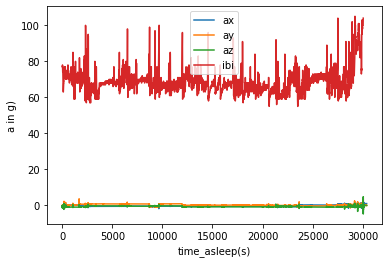

In [28]:
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['ax'],label='ax')
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['ay'],label='ay')
plt.plot(participant_5498603_acc['time_to_sleep'],participant_5498603_acc['az'],label='az')
plt.plot(participant_5498603_ibi['time_to_sleep'],participant_5498603_ibi['ibi'],label='ibi')
plt.xlabel('time_asleep(s)')
plt.ylabel('a in g)')
plt.legend()
plt.show()

let us rescale them all to observe the relative trends 


In [29]:
from sklearn.preprocessing import StandardScaler

In [32]:
participant_5498603_acc

,time_to_sleep,ax,ay,az
153246,0.011281,-0.780762,-0.147369,-0.614380
153247,0.031235,-0.779297,-0.154694,-0.608978
153248,0.051194,-0.778336,-0.147324,-0.607544
153249,0.071148,-0.776856,-0.144867,-0.609024
153250,0.091204,-0.765518,-0.146866,-0.613815
...,...,...,...,...
1654286,30394.892956,1.001465,0.020187,-0.035706
1654287,30394.912894,1.001465,0.019684,-0.036667
1654288,30394.932836,1.002441,0.021667,-0.034729
1654289,30394.952839,1.001450,0.019699,-0.034729


In [33]:
participant_5498603_ibi

,time_to_sleep,ibi
1244,5.16105,77
1245,10.16105,77
1246,11.16105,78
1247,20.16102,78
1248,25.16105,76
...,...,...
7031,30031.15763,100
7032,30033.15763,100
7033,30039.15763,100
7034,30048.15763,104


In [35]:
merged_dataframe = pd.merge_asof( participant_5498603_acc.sort_values('time_to_sleep'),participant_5498603_ibi.sort_values('time_to_sleep'),on='time_to_sleep')

In [36]:
merged_dataframe = pd.merge_asof(merged_dataframe ,participant_5498603_labels,on='time_to_sleep')

In [37]:
merged_dataframe[merged_dataframe['time_to_sleep']>30]

,time_to_sleep,ax,ay,az,ibi,sleep_stage
1503,30.005565,-0.540466,-0.365982,-0.758743,76.0,-1.0
1504,30.025521,-0.542969,-0.357117,-0.754913,76.0,-1.0
1505,30.045546,-0.543930,-0.351746,-0.758850,76.0,-1.0
1506,30.065310,-0.544403,-0.350815,-0.764694,76.0,-1.0
1507,30.085397,-0.545395,-0.347366,-0.764725,76.0,-1.0
...,...,...,...,...,...,...
1501040,30394.892956,1.001465,0.020187,-0.035706,104.0,-1.0
1501041,30394.912894,1.001465,0.019684,-0.036667,104.0,-1.0
1501042,30394.932836,1.002441,0.021667,-0.034729,104.0,-1.0
1501043,30394.952839,1.001450,0.019699,-0.034729,104.0,-1.0


In [ ]:
merged_dataframe = merged_dataframe.sample

In [38]:
scaler = StandardScaler()

In [39]:
merged_dataframe[['ax','ay','az','ibi']]=scaler.fit_transform(merged_dataframe[['ax','ay','az','ibi']])

In [40]:
merged_dataframe[['ax','ay','az','ibi']]

,ax,ay,az,ibi
0,-1.071497,-0.862493,0.015592,NaN
1,-1.068023,-0.878795,0.035803,NaN
2,-1.065743,-0.862391,0.041170,NaN
3,-1.062233,-0.856923,0.035632,NaN
4,-1.035347,-0.861372,0.017705,NaN
...,...,...,...,...
1501040,3.155035,-0.489549,2.180821,4.554712
1501041,3.155035,-0.490670,2.177224,4.554712
1501042,3.157351,-0.486255,2.184475,4.554712
1501043,3.154999,-0.490636,2.184475,4.554712


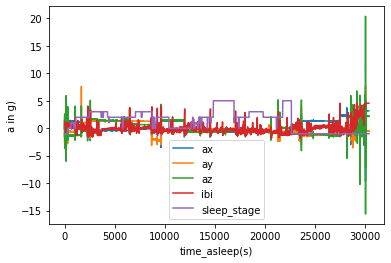

In [41]:
plt.plot(merged_dataframe['time_to_sleep'],merged_dataframe['ax'],label='ax')
plt.plot(merged_dataframe['time_to_sleep'],merged_dataframe['ay'],label='ay')
plt.plot(merged_dataframe['time_to_sleep'],merged_dataframe['az'],label='az')
plt.plot(merged_dataframe['time_to_sleep'],merged_dataframe['ibi'],label='ibi')
plt.plot(merged_dataframe['time_to_sleep'],merged_dataframe['sleep_stage'],label='sleep_stage')
plt.xlabel('time_asleep(s)')
plt.ylabel('a in g)')
plt.legend()
plt.show()

In [42]:
merged_dataframe=merged_dataframe[merged_dataframe['time_to_sleep']>30]

In [43]:
merged_dataframe.columns

Index(['time_to_sleep', 'ax', 'ay', 'az', 'ibi', 'sleep_stage'], dtype='object')

In [44]:
next_thirty_seconds = merged_dataframe[(merged_dataframe['time_to_sleep'] > 30) & (merged_dataframe['time_to_sleep'] <= 60)]

In [45]:
next_thirty_seconds

,time_to_sleep,ax,ay,az,ibi,sleep_stage
1503,30.005565,-0.501639,-1.349075,-0.524573,0.905459,-1.0
1504,30.025521,-0.507573,-1.329343,-0.510243,0.905459,-1.0
1505,30.045546,-0.509853,-1.317388,-0.524973,0.905459,-1.0
1506,30.065310,-0.510975,-1.315316,-0.546840,0.905459,-1.0
1507,30.085397,-0.513327,-1.307641,-0.546954,0.905459,-1.0
...,...,...,...,...,...,...
3002,59.917394,-0.651630,-1.029962,-0.538333,0.644798,-1.0
3003,59.937295,-0.646998,-1.014679,-0.543928,0.644798,-1.0
3004,59.957359,-0.648156,-1.010298,-0.540331,0.644798,-1.0
3005,59.977272,-0.651630,-1.001637,-0.562312,0.644798,-1.0


In [50]:
next_thirty_seconds.sample(1490)

,time_to_sleep,ax,ay,az,ibi,sleep_stage
5082,101.424165,-0.655140,-1.012506,-0.545812,-0.788837,-1.0
5812,115.989872,-0.645768,-0.999464,-0.565909,-0.658507,-1.0
4530,90.410377,-0.649242,-0.994064,-0.578755,-0.658507,-1.0
5136,102.501760,-0.639942,-0.997290,-0.564082,-0.788837,-1.0
5643,112.617584,-0.637626,-0.989649,-0.565966,-0.658507,-1.0
...,...,...,...,...,...,...
4540,90.609972,-0.645804,-1.002724,-0.558601,-0.658507,-1.0
5166,103.100283,-0.643452,-0.991822,-0.567793,-0.788837,-1.0
4847,96.735295,-0.642294,-0.989615,-0.564196,-0.788837,-1.0
4889,97.573549,-0.649314,-0.993962,-0.558715,-0.788837,-1.0


In [60]:
merged_dataframe.tail(1)['time_to_sleep']

1501044    30394.972818
Name: time_to_sleep, dtype: float64

In [62]:
for i in range(30,30394,30):
    if i<90:
        print(i)
    if i >= 30390:
        print(i)


30
60
30390


In [48]:
next_thirty_seconds = merged_dataframe[(merged_dataframe['time_to_sleep'] > 90) & (merged_dataframe['time_to_sleep'] <= 120)]

In [49]:
next_thirty_seconds

,time_to_sleep,ax,ay,az,ibi,sleep_stage
4510,90.011324,-0.655212,-1.001536,-0.538675,-0.658507,-1.0
4511,90.031253,-0.655140,-0.998343,-0.553292,-0.658507,-1.0
4512,90.051260,-0.649278,-1.012573,-0.558544,-0.658507,-1.0
4513,90.071146,-0.649314,-1.007071,-0.553120,-0.658507,-1.0
4514,90.091116,-0.650363,-1.014815,-0.576757,-0.658507,-1.0
...,...,...,...,...,...,...
6008,119.900699,-0.653910,-1.024596,-0.556603,-0.397846,-1.0
6009,119.920644,-0.663318,-0.987407,-0.557117,-0.397846,-1.0
6010,119.940588,-0.663354,-0.981939,-0.557174,-0.397846,-1.0
6011,119.960496,-0.656334,-1.001569,-0.547753,-0.397846,-1.0


In [33]:
df=merged_dataframe

In [72]:
import torch
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv1d(1, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv2 = nn.Conv1d(256, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv3 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv4 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 51, 32)
        self.dropout2 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(32, 1)
        self.softmax = nn.Softmax(dim=1)  # Softmax along dimension 1 (each row)
    
    def forward(self, x):
        x = torch.unsqueeze(x, 1)  # Add channel dimension
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.dropout1(x)
        x = torch.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Create an instance of the model
model = ConvNet()

# Print model summary
print(model)


ConvNet(
  (conv1): Conv1d(1, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool1): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv2): Conv1d(256, 256, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool2): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (conv3): Conv1d(256, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool3): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv4): Conv1d(128, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool4): MaxPool1d(kernel_size=5, stride=2, padding=2, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=13056, out_features=32, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (softmax): Softmax(dim=1)
)


In [61]:
df['sleep_stage']

1499      -1.0
1500      -1.0
1501      -1.0
1502      -1.0
1503      -1.0
          ... 
1268821   -1.0
1268822   -1.0
1268823   -1.0
1268824   -1.0
1268825   -1.0
Name: sleep_stage, Length: 1267327, dtype: float64

In [79]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Assuming your DataFrame is named 'df'

# Drop rows with NaN values in the 'sleep_stage' column
df = df.dropna(subset=['sleep_stage'])

# Extract features and labels
features = df[['ax', 'ay', 'az', 'ibi']].values  # Assuming 'ax', 'ay', 'az', and 'ibi' are the features
labels = df['sleep_stage'].values  # Assuming 'sleep_stage' is the label column

# Reshape features into 3D array (num_samples, num_timesteps, num_features)
num_samples = len(df) // 30  # Number of 30-second epochs
num_timesteps = 30  # 30 seconds per epoch
num_features = features.shape[1]  # Number of features

features_3d = features[:num_samples * num_timesteps].reshape(num_samples, num_timesteps, num_features)

# Convert labels to one-hot encoding
num_classes = len(df['sleep_stage'].unique())
labels_onehot = np.zeros((len(labels), num_classes))

# Filter out NaN values from labels
valid_labels_mask = ~np.isnan(labels)
valid_labels = labels[valid_labels_mask]

# Convert valid labels to one-hot encoding
labels_onehot[np.arange(len(valid_labels)), valid_labels.astype(int)] = 1

# Convert labels to PyTorch tensor
labels_tensor = torch.tensor(labels_onehot, dtype=torch.float32)

# Convert features to PyTorch tensor
features_tensor = torch.tensor(features_3d, dtype=torch.float32)
class_indices = torch.argmax(labels_tensor, dim=1)

# Define your neural network, loss function, optimizer, and training loop (same as previous code snippet)


In [60]:
labels[500]

-1.0

In [81]:

# Define your neural network
class SleepStagePredictionNet(nn.Module):
    def __init__(self, num_features, num_classes):
        super(SleepStagePredictionNet, self).__init__()
        
        self.conv1 = nn.Conv1d(num_features, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv2 = nn.Conv1d(256, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv3 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv4 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 94, 32)  # Adjust input size based on the output size of the previous layer
        self.dropout2 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.dropout1(x)
        x = torch.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SleepStagePredictionNet(num_features, num_classes)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



# Training loop (assuming you have separate training and validation data)
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(features_tensor)
    
    # Convert one-hot encoded labels tensor to class indices
    class_indices = torch.argmax(labels_tensor, dim=1)
    
    # Compute loss using class indices
    loss = criterion(outputs, class_indices)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss (optional)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

RuntimeError: Given groups=1, weight of size [256, 4, 5], expected input[42244, 30, 4] to have 4 channels, but got 30 channels instead

In [48]:
features_tensor.shape

torch.Size([42244, 30, 4])

In [50]:
labels_tensor.shape

torch.Size([1267327, 6])

In [75]:
class_indices = torch.argmax(labels_tensor, dim=1)

In [77]:
class_indices[2000]

tensor(5)

In [86]:
# Define your neural network
class SleepStagePredictionNet(nn.Module):
    def __init__(self, num_channels, num_classes):
        super(SleepStagePredictionNet, self).__init__()
        
        self.conv1 = nn.Conv1d(num_channels, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool1 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv2 = nn.Conv1d(256, 256, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool2 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.conv3 = nn.Conv1d(256, 128, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool3 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        self.dropout1 = nn.Dropout(0.2)
        
        self.conv4 = nn.Conv1d(128, 64, kernel_size=5, stride=1, padding=2)  # 'same' padding
        self.pool4 = nn.MaxPool1d(kernel_size=5, stride=2, padding=2)  # 'same' padding
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 94, 32)  # Adjust input size based on the output size of the previous layer
        self.dropout2 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.dropout1(x)
        x = torch.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = SleepStagePredictionNet(num_channels=4, num_classes=num_classes)


In [87]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



# Training loop (assuming you have separate training and validation data)
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(features_tensor)
    
    # Convert one-hot encoded labels tensor to class indices
    class_indices = torch.argmax(labels_tensor, dim=1)
    
    # Compute loss using class indices
    loss = criterion(outputs, class_indices)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss (optional)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (42244x128 and 6016x32)

In [84]:
features_tensor = features_tensor.permute(0, 2, 1)

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Dense


ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (/opt/nesi/CS400_centos7_bdw/TensorFlow/2.8.2-gimkl-2022a-Python-3.10.5/lib/python3.10/site-packages/tensorflow/_api/v2/compat/v2/experimental/__init__.py)